![Title](Images/cisco.png)

# Потехина Вера - Фт-370008

#  Лабораторная работа - Визуализация данных скорости Интернета - var F

### Цели
<li>**Часть 1: Очистка и анализ данных **</li>
<li>**Часть 2: Визуализация данных **</li>
### История/Cценарий
В этой лабораторной работе вы узнаете, как использовать библиотеку `pandas` для выполнения предварительных шагов, которые необходимы, прежде чем приступать к анализу данных, включая удаление отсутствующих значений, изменение формата данных и предварительный статистический анализ. 
После очистки данных вы будете использовать `matplotlib` для исследования и визуализации данных.

### Необходимые ресурсы
* 1 ПК с доступом в Интернет
* Raspberry Pi версии 2 или выше
* Библиотеки Python: datetime, csv, subprocess, pandas, numpy
* Файл данных: data_long.csv

## Часть 1: Очистка и анализ данных

Иногда говорят, что специалисты по машинному обучению тратят 80% времени на очистку данных. Хотя это утверждение, возможно, является преувеличением, верно то, что очистка данных является фундаментальной задачей, необходимой для обеспечения успеха проекта машинного обучения. Как и в многих других областях здесь применяется закон 'мусор на входе - мусор на выходе'. Просто невозможно провести осмысленный анализ данных по 'грязным' данным. 

#### Шаг 1: Очистка данных.

Загрузите данные из файла `rpi_data_compact.csv`. Этот файл содержит измерения скорости интернета, полученные во время лабораторной работы Internet_Speed_Data_Acquisition. В частности, основное внимание уделяется трем величинам: времени пинга (мс), скорости загрузки (Мбит / с) и скорости выгрузки (Мбит / с). 

###### a) Прочитайте данные из  `rpi_data_compact.csv`.

Прочитайте файл `./Data/rpi_data_compact.csv` в кадр данных Pandas под названием `df_compact` и просмотрите первые три строки этого кадра данных, используя `df.head`. 

In [4]:
# Ячейка для кода № 1
import pandas as pd
import numpy as np

In [52]:
# Ячейка для кода № 2
# Импортируйте данные из файла csv и визуализируйте первые строки
df_compact = pd.read_csv('rpi_data_compact.csv')
df_compact.head(5)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


###### b) Удалите ненужные столбцы.

Как вы могли заметить, в кадре данных `df_compact` есть дополнительный столбец. Используйте команду `df.drop`, чтобы удалить этот столбец. Если Вам нужна помощь обратитесь к лабораторной работе Internet_Speed_Data_Acquisition.

In [53]:
# Ячейка для кода № 3
# Удалите ненужные столбцы
del df_compact['Unnamed: 0']
df_compact.head(5)

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


###### c) Удалите `NaNs`.

Общей проблемой, которая влияет на качество данных, является наличие значений `NaN`. Это может привести к тому, что функции анализа данных резко прекратят расчет, выдадут ошибку или создадут неверные результаты. Как правило, значения NaN представляют собой часть информации, которая должна содержаться в наборе данных, но отсутствует в нем. 
В этом примере значения `NaN` в `df_compact` могут представлять собой измерения, в которых произошел разрыв соединения с Интернетом, либо, когда сервер `Speedtest.net` не смог ответить на запросы от Raspberry Pi. Код ниже подсичтывает количество значений `NaN` в кадре данных. 

Сначала перейдите на страницу http://pandas.pydata.org/pandas-docs/version/0.14.1/index.html и выполните поиск `isnull` в окне поиска. ![Image](Images/pandas_screenshot.png)

Документация функции `isnull` немного сложна для понимания. К счастью, интерактивный интерфейс Jupyter позволяет нам вызвать эту функцию и быстро изучить ее вывод.

In [54]:
# Ячейка для кода № 4
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()


<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


Результатом функции `isnull` является новый кадр данных, который содержит `True` или `False`, если соответствующий элемент в `DataFrame` имеет значение `NaN` или нет. Использование функции `sum` на этом `DataFrame` автоматически преобразует значения `True` в 1s и `False` в 0s.  

In [55]:
# Ячейка для кода № 5
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

Получаемый `NaN_per_column` представляет собой объект `Series` библиотеки `pandas`, который можно рассматривать как один столбец в`DataFrame` (`DataFrame` на самом деле является типом `Series`, где ключи являются именами столбцов). Объект `Series` содержит почти все функциональные возможности `DataFrame`. 
Используйте функцию `sum` на `Nan_per_column Series` и выведите результат.

In [56]:
# Ячейка для кода № 6
NaNs_total = NaNs_per_column.sum()
NaNs_total

23

Можно объединить все эти команды в одну строку следующим образом:

In [57]:
# Ячейка для кода № 7
df_compact.isnull().sum().sum()

23

Вычислите количество отсутствующих значений в процентах от всех элементов в кадре данных (округлите результат до второго десятичного знака, используя `numpy.round` https://docs.scipy.org/doc/numpy/reference/generated/numpy.round_.html) 

Используйте функцию `dropna` библиотеки `pandas` для удаления значений `NaN` из `df_compact`.

In [58]:
# Ячейка для кода № 8
NaNs_pct = np.round(df_compact.isnull().sum().sum()/float(len(df_compact)*len(df_compact.columns))*100, decimals = 2)
print('The DataFrame contains : {} NaNs, equal to {} of the measurements'.format(NaNs_total, NaNs_pct))

The DataFrame contains : 23 NaNs, equal to 0.68 of the measurements


Функция `dropna`, если вызывается только с параметрами по умолчанию, удаляет все строки в `DataFrame`, если какое-либо из значений имеет значение `NaN'. 

In [59]:
# Ячейка для кода № 9
# Удаление значений NaN
df_compact_clean = df_compact.dropna()

Сравните длину значений до и после использования `dropna`. Вы заметили что-то странное? Почему?

In [60]:
# Ячейка для кода № 10
NaNs_total_clear = df_compact_clean.isnull().sum().sum()
NaNs_pct_clear = np.round(df_compact_clean.isnull().sum().sum()/float(len(df_compact_clean)*len(df_compact_clean.columns))*100, decimals = 2)
print('The DataFrame contains : {} NaNs, equal to {} of the measurements'.format(NaNs_total_clear, NaNs_pct_clear))

The DataFrame contains : 0 NaNs, equal to 0.0 of the measurements


Ответ: всё логично, значения NaN пропали после удаления.

###### d) Измените формат значений.

Столбцы под значения времени пинга, скорости загрузки и скорости выгрузки в кадре данных `df_compact` содержат числовые значения. Поэтому разумно ожидать, что все они будут использовать один тип данных, например, `float64`. Это, однако, не всегда верно и мы может это проверить с помощью `dtypes`: 

In [61]:
# Ячейка для кода № 11
# Тип значений Ping и Download не float
df_compact_clean.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

Используйте функцию Python `float()` для преобразования строкового значения в формат `float`.

In [62]:
# Ячейка для кода № 12
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


Теперь преобразуем все значения столбцов 'Ping (ms)' и 'Download (Mbit/s)' в float. Подсказка: используйте `apply` и `lambda`. За помощью обратитесь к лабораторной работе Internet_Speed_Data_Acquisition.

In [63]:
# Ячейка для кода № 14
# это отключает предупреждение блокнота, которое не имеет отношения к нашему случаю
pd.options.mode.chained_assignment = None

# Преобразование Ping и Download в float
df_compact_clean['Ping (ms)_float'] = df_compact_clean['Ping (ms)'].apply(lambda it: float(it))
df_compact_clean['Download (Mbit/s)_float'] = df_compact_clean['Download (Mbit/s)'].apply(lambda it: float(it))

#Убедитесь, что типы были успешно преобразованы
df_compact_clean.dtypes

Ping (ms)                   object
Download (Mbit/s)           object
Upload (Mbit/s)            float64
Date                        object
Time                        object
Ping (ms)_float            float64
Download (Mbit/s)_float    float64
dtype: object

Теперь удалите исходные столбцы `Ping (ms)` и `Download (Mbit/s)` и переименуйте новые `Ping (ms)_float` и `Download (Mbit/s)_float` в `Ping (ms)` и `Download (Mbit/s)`. Используйте `df.drop` и `df.rename`, как в лабораторной работе Internet_Speed_Data_Acquisition.

In [64]:
# Ячейка для кода № 15
# Удалите исходные столбцы 'Ping (ms)' и 'Download (Mbit/s)'
df_compact_clean.drop(['Ping (ms)','Download (Mbit/s)'],axis=1, inplace=True)
# Переименуйте новый 'Ping (ms) float' и 'Download (Mbit/s) float ' в Ping (ms)' и 'Download (Mbit/s)
df_compact_clean.rename(columns={'Download (Mbit/s)_float':'Download (Mbit/s)', 
                           'Ping (ms)_float': 'Ping (ms)'}, inplace=True)

In [65]:
# Ячейка для кода № 16
df_compact_clean.head()

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


Прежде чем сохранять `DataFrame`, имеет смысл переместить столбец `Upload` в конец. Это может быть достигнуто с помощью функции `reindex`.

In [66]:
# Ячейка для кода № 17
#df.reindex(['http_status', 'user_agent'], axis="columns")
df_compact_clean = df_compact_clean.reindex(columns = ['Date','Time','Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']);
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


Теперь, когда набор данных окончательно чист, сохраните его в файле csv и переименуйте его.

In [67]:
# Ячейка для кода № 18
# Сохраним новый очищенный кадр данных в csv
df_compact_clean.to_csv('rpi_data_compact_clean.csv')
df_clean = df_compact_clean

#### Шаг 2. Базовая статистика.

Новые данные требуют не только очистки, но и более тщательного исследования. Когда вы начинаете проект анализа данных, стоит инвестировать усилия в изучение и вычисление некоторых основных статистических свойств данных. Это влечет за собой расчёт среднего значения, среднеквадратических отклонений и корреляций. 

######  a) Вычислить среднее значение и среднеквадратическое отклонение с помощью Pandas.

Среднее значение и среднеквадратическое отклонение всех столбцов в `DataFrame` можно вычислить с помощью `mean()` и `std()` .
Найдите их в документации библиотеки `pandas` и примените их к `df_clean DataFrame`  

Выведите результат как `количество = среднее значение ± среднеквадратическое отклонение`. Не забудьте включить единицы измерения, связанные с каждой величиной. 

In [68]:
# Ячейка для кода № 19
# Вычислить среднее значение и среднеквадратическое отклонение для всех столбцов df_compact
# РЕШЕНИЕ:
means = df_clean.mean()
stands = df_clean.std()

# Поместите среднее значение и среднеквадратическое отклонение для каждого столбца в кортеж
stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# Выведите на экран среднее значение ± среднеквадратическое отклонение, включая единицы измерения
print('Среднее время пинга: {} ± {} ms'.format(stats_ping[0],stats_ping[1]))
print('Средняя скорость загрузки: {} ± {} Mbit/s'.format(*stats_download))
print('Средняя скорость выгрузки: {} ± {} Mbit/s'.format(*stats_upload))

Среднее время пинга: 21.115451708766717 ± 5.161225495663228 ms
Средняя скорость загрузки: 90.44921248142644 ± 3.465647031815227 Mbit/s
Средняя скорость выгрузки: 13.697607726597328 ± 1.0804708853031766 Mbit/s


###### b) Рассчитайте минимальное и максимальное отклонение с помощью Pandas.

Найдите в документации библиотеки `pandas` информацию о том, как вычислить минимальные и максимальные значения для всех столбцов в `DataFrame`.

In [69]:
# Ячейка для кода № 23
# Вычислите max и min для всех столбцов df_compact
mins = df_clean.min()
maxs = df_clean.max()

# Укажите среднее значение и среднеквадратическое отклонение для каждого столбца в кортеже
mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

# Выведите на экран средние и максимальные значения, включая единицы измерения
print('Минимальное время пинга: {} ms. Максимальное время пинга: {} ms'.format(*mima_ping))
print('Минимальная скорость загрузки: {} Mbit/s. Максимальная скорость загрузки: {} Mbit/s'.format(*mima_download))
print('Минимальная скорость выгрузки: {} Mbit/s. Максимальная скорость выгрузки: {} Mbit/s'.format(*mima_upload))

Минимальное время пинга: 16.167 ms. Максимальное время пинга: 76.528 ms
Минимальная скорость загрузки: 58.48 Mbit/s. Максимальная скорость загрузки: 92.87 Mbit/s
Минимальная скорость выгрузки: 6.21 Mbit/s. Максимальная скорость выгрузки: 14.55 Mbit/s


###### c) Используйте функцию  `describe`  библиотеки `pandas`.
Выполните следующую строку кода. Обратите внимание, сколько времени библиотека `pandas` может сэкономить Вам даже с одной строкой кода!   

In [70]:
# Ячейка для кода № 24
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


###### d) Используйте `argmin`, `argmax` и `iloc`.

Предположим, вы хотели бы написать скрипт, который автоматически отправляет отчеты о статусе интернет-соединения вашему Интернет-провайдеру. Отчеты должны включать дату и время, соответствующие минимальной скорости интернета. Временная информация позволит Интернет-провайдеру точно идентифицировать причину медленного соединения, которое вы наблюдаете. 

Используя функции `argmin` и `argmax` библиотеки `pandas`, найдите значения даты и времени, соответствующие самому большому и малому времени пинга, самой низкой и самой высокой скорости загрузки, а также самой низкой и самой высокой скорости выгрузки.

In [82]:
# Ячейка для кода № 25
# Найдите минимальное и максимальное время пинга
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()

# Найдите минимальную и максимальную скорость загрузки
argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()

# Найдите минимальную и максимальную скорость выгрузки
argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

461

Функции `argmin` и `argmax` возвращают индекс по отношению к строкам `Dataframe`. Чтобы получить доступ к определенной строке по её индексу, используйте `iloc`.

In [72]:
# Ячейка для кода № 26
# Создайте небольшой кадр данных и получите доступ к его строкам с помощью iloc

# Кадр дранных pandas может быть инициализирован передачей dict в качестве параметра в конструктор pd.DataFrame(). 
# Ключ будет представлять собой столбец значений строк.
df = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [85]:
# Ячейка для кода № 27
# Чтобы получить доступ к field_1 первой строки используйте команду iloc()
df.iloc[0,0]

0

Используйте индексы, рассчитанные с помощью  `argmax` и `argmin` в сочетании с `iloc`, чтобы визуализировать `Date` и `Time` 
максимального/минимального Ping, Download, и Upload.

In [96]:
# Ячейка для кода № 28
#Выведите на экран соответствующие значения даты и времени
print('Время пинга достигло минимального значения в {0} {1}'.format(df_clean.iloc[argmin_ping,1], 
                                                        df_clean.iloc[argmin_ping,0]))

print('Замер скорости загрузки достиг минимального значения в {0} {1}'.format(df_clean.iloc[argmin_download,1], 
                                                        df_clean.iloc[argmin_download,0]))

print('Замер скорости выгрузки достиг минимального значения в {0} {1}'.format(df_clean.iloc[argmin_upload,1], 
                                                        df_clean.iloc[argmin_upload,0]))

print('Время пинга достигло максимального значения в {0} {1}'.format(df_clean.iloc[argmax_ping,1], 
                                                        df_clean.iloc[argmax_ping,0]))

print('Замер скорости загрузки достиг минимального значения в {0} {1}'.format(df_clean.iloc[argmin_download,1], 
                                                        df_clean.iloc[argmax_download,0]))

print('Замер скорости выгрузки достиг минимального значения в {0} {1}'.format(df_clean.iloc[argmin_upload,1], 
                                                        df_clean.iloc[argmax_upload,0]))


Время пинга достигло минимального значения в 15:26:20 2016-11-24
Замер скорости загрузки достиг минимального значения в 14:57:55 2016-11-24
Замер скорости выгрузки достиг минимального значения в 17:31:47 2016-11-24
Время пинга достигло максимального значения в 17:30:06 2016-11-24
Замер скорости загрузки достиг минимального значения в 14:57:55 2016-11-24
Замер скорости выгрузки достиг минимального значения в 17:31:47 2016-11-24


###### e) Рассчитайте корреляцию.

Полезно проанализировать, имеет ли скорость загрузки тенденцию увеличиваться и уменьшаться вместе со скоростью выгрузки. Причиной этого было бы то, что использование сети и технические проблемы должны влиять на загрузку и выгрузку одинаково. 

В этом случае скорость загрузки и выгрузки будет названа *положительно коррелированной*. Это означает, что более быстрая загрузка и выгрузка обычно происходят вместе. Это относится к общей тенденции, но случаи быстрой загрузки с медленной выгрузкой все равно будут возможны. 

С другой стороны, вы можете сделать вывод о том, что более высокая скорость загрузки подразумевает более низкую скорость выгрузки и наоборот. В этом случае аргументом будет то, что интернет-линия может поддерживать обмен только ограниченного объема информации. Загрузка и выгрузка затем будет конкурировать и держать друг друга 'под контролем'.

В этом случае скорость загрузки и выгрузки будет вызвана *отрицательно коррелированной*. Это означает, что загрузка, как правило, будет быстрее, когда выгрузка будет медленнее, и наоборот. Как и прежде, это будет относиться к тенденции, так что одновременно хорошая скорость загрузки и выгрузки будет по-прежнему возможна. 

Чтобы завершить картину, время пинга может быть положительно или отрицательно коррелировано с загрузкой или выгрузкой. Тогда естественно думать о таблице, где каждая величина сравнивается со всеми другими. Такие таблицы являются известными математическими объектами, и дублируются *корреляционными матрицами*. 

Используйте функцию `corr` библиотеки `pandas` для получения корреляционной матрицы времени пинга, скорости загрузки, и выгрузки. Сохраните результат в переменной под названием `df_corr`. 

In [97]:
# Ячейка для кода № 29
# Связаны ли эти переменные?
df_corr = df_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


Ответ: связан пинг со скоростью выгрузки, но не сильно

In [98]:
# Ячейка для кода № 30
corr = df_corr.values
print('Коэффициент корреляции между временем пинга и скоростью загрузки: {}'.format(corr[0, 1]))
print('Коэффициент корреляции между временем пинга и скоростью выгрузки: {}'.format(corr[0, 2]))
print('Коэффициент корреляции между скоростью загрузки и скоростью выгрузки: {}'.format(corr[2, 1]))

Коэффициент корреляции между временем пинга и скоростью загрузки: -0.045626110258379995
Коэффициент корреляции между временем пинга и скоростью выгрузки: -0.4630987138300184
Коэффициент корреляции между скоростью загрузки и скоростью выгрузки: 0.08368996933725129


Эти цифры отвечают на вопросы об 'отношениях' между временем пинга, скоростью загрузки, и скоростью выгрузки. Идеальная положительная корреляция дает значение +1, тогда как идеальная отрицательная корреляция дает значение -1. Тем не менее, корреляции между скоростью загрузки и временем пинга, а также между скоростью загрузки и скоростью выгрузки близки к нулю. Более того, корреляция между скоростью выгрузки и временем пинга невелика. Это приводит к выводу, что три величины фактически взаимно **некоррелированные**. 



## Часть 2. Визуализация данных

Как говорится в пословице: 'Лучше один раз увидеть, чем сто раз услышать'. Информативные, осмысленные и интуитивные графики играют решающую роль в исследовании данных. Графики полезны на начальных этапах проекта, и далеко за его пределами. Графы - отличный способ представить результаты и выводы вашей работы перед аудиторией.

Python имеет обширную библиотеку для создания графиков под названием `Matplotlib`. В качестве дополнительного учебного ресурса, безусловно, стоит взглянуть на официальную документацию [Matplotlib](http://matplotlib.org/index.html), и в частности на многочисленные [примеры](http://matplotlib.org/examples/index.html). 

#### Шаг 1. Создайте первую визуализацию данных скорости Интернета.

Визуализируйте содержимое `df_clean` `DataFrame`.

###### a) Импорт Matplotlib.

In [99]:
# Ячейка для кода № 31
import matplotlib.pyplot as plt
# Следующий код позволяет вашему блокноту Jupyter создавать графики внутри ячейки
%matplotlib inline 

###### b) График статистики по скорости интернета.

Основываясь на том, что вы узнали в лабораторной работе SF_Crime_Data lab,  сгенерируйте график, содержащий три строки: 1. ping (ms), как функция от времени, 2. upload (Mbit/s), как функция от времени, и 3. download (Mbit/s), как функция от времени. Используйте функцию legend() , чтобы добавить легенду к вашему графику, но не беспокойтесь о маркировке осей. Мы узнаем, как это сделать чуть позже.  

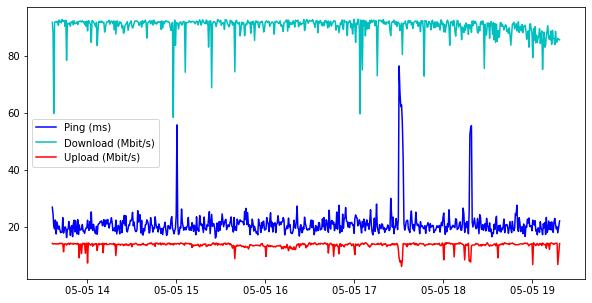

In [106]:
# Ячейка для кода № 32
# Инициализируйте рисунок 
fig, ax = plt.subplots(figsize=(10, 5))

# Создайте ось x
t = pd.to_datetime(df_clean['Time'])


# Выведите три кривые разных цветов
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)', color = 'b')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)', color = 'c')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)', color = 'r')

# Добавьте легенду
ax.legend()
plt.show()

###### c) Измените стиль линий.
Поскольку измерения времени пинга включают в себя большие и резкие изменения, они, возможно, лучше визуализируются с использованием точек. Внутри команды `ax.plot(...)` для обработки данных о времени пинга, укажите, что эти измерения представлены в виде точек. (Здесь можно повторно использовать большую часть кода из предыдущей задачи.) 

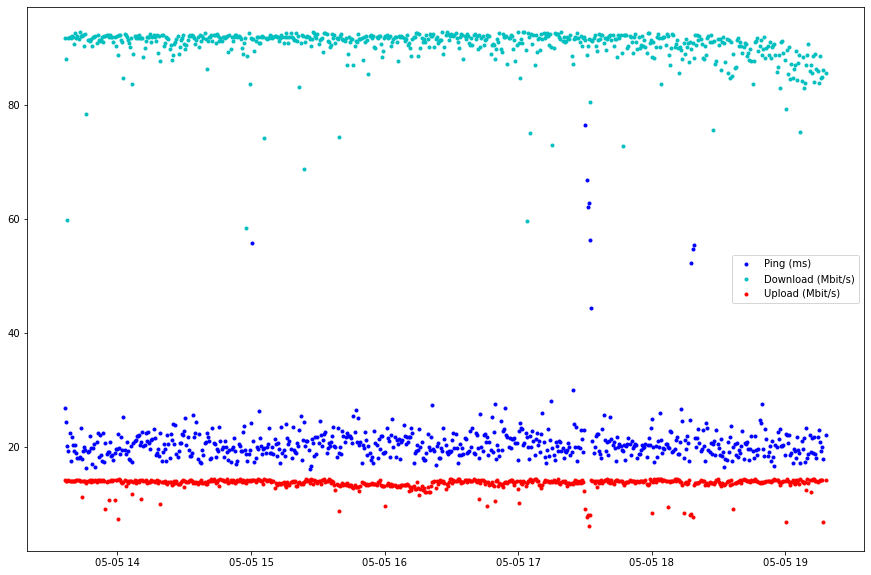

In [122]:
# Ячейка для кода № 33
# Инициализируйте рисунок
fig, ax = plt.subplots(figsize=(15, 10))

# Нарисуйте три кривых. Данные о времени пинга 
# визуализируются с использованием точек
t = pd.to_datetime(df_clean['Time'])

ax.plot(t, df_clean['Ping (ms)'], "ro",  markersize=3,label='Ping (ms)', color = 'b')
ax.plot(t, df_clean['Download (Mbit/s)'],"ro",  markersize=3, label='Download (Mbit/s)', color = 'c')
ax.plot(t, df_clean['Upload (Mbit/s)'] ,"ro",  markersize=3, label='Upload (Mbit/s)', color = 'r')


# Добавьте легенду
ax.legend()
plt.show()

###### d) Добавьте обозначения осей.

График без названия и обозначения осей трудно понять, так как нельзя точно знать, какие значения изображаются. Сделайте приведенный выше график совместимым со стандартной научной практикой, добавив обозначения осей и название. Укажите размер шрифта около 16, чтобы название и ярлыки были напечатаны красиво и понятно. 

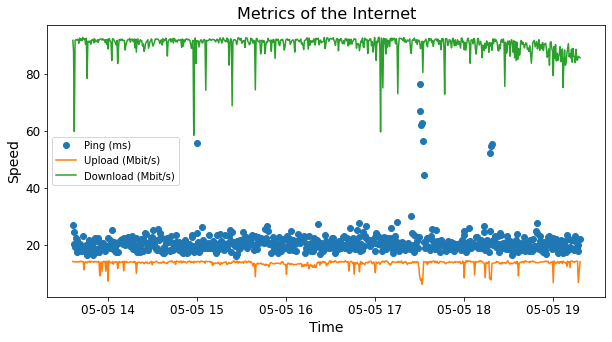

In [132]:
# Ячейка для кода № 35
# Инициализируйте рисунок
fig, ax = plt.subplots(figsize=(10, 5))

# Нарисуйте три кривых
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

# Добавьте легенду
ax.legend()

# Добавить обозначения осей и название
ax.set_xlabel('Time',fontsize = 14)
ax.set_ylabel('Speed',fontsize = 14)
ax.set_title('Metrics of the Internet',fontsize = 16)

# Измените размер отметок
ax.tick_params(labelsize=12)

###### e)  Измените тему диаграммы.
Используйте `'fivethirtyeight'` [style context](http://matplotlib.org/examples/style_sheets/plot_fivethirtyeight.html) , чтобы сделать предыдущий график более привлекательным. Для этого добавьте строку с `with` в ваш код, перед вызовом функций `Matplotlib`.

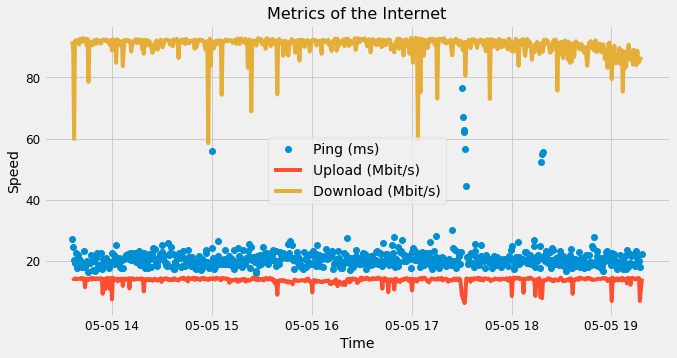

In [137]:
# Ячейка для кода № 36
# Используйте style context
with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots(figsize=(10, 5))

    # Нарисуйте три кривых
    t = pd.to_datetime(df_clean['Time'])
    ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
    ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
    ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

    # Добавьте легенду
    ax.legend()

    # Добавить обозначения осей и название
    ax.set_xlabel('Time',fontsize = 14)
    ax.set_ylabel('Speed',fontsize = 14)
    ax.set_title('Metrics of the Internet',fontsize = 16)

    # Измените размер отметок
    ax.tick_params(labelsize=12)

###### f) Создайте гистограмму.

Гистограмма представляет собой графическое представление частоты значений числовых данных. Изучите приведенный ниже код. Дополнительным уровнем сложности является использование функции 'subplot()' для отображения гистограмм бок о бок. 

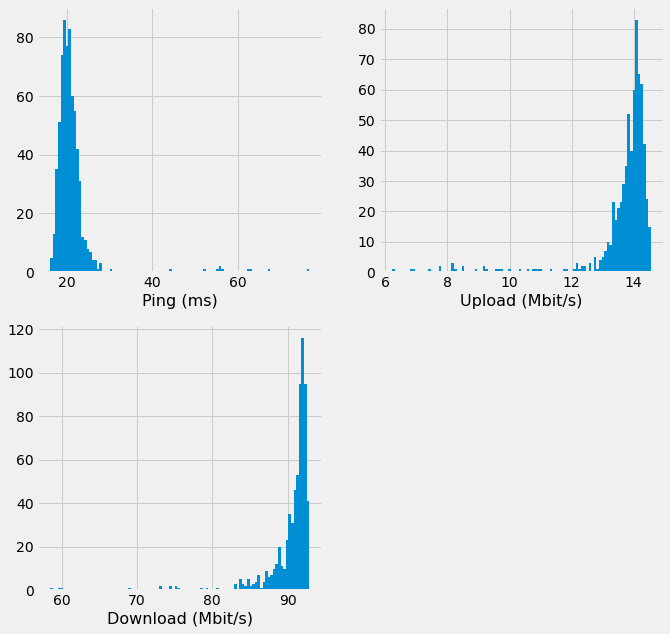

In [140]:
# Ячейка для кода № 37
with plt.style.context('fivethirtyeight'):
    
    nbins = 100
    # Инициализируйте рисунок
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping (ms)'], nbins)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], nbins)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_clean['Download (Mbit/s)'], nbins)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>